In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('./car/train.csv')
test_df = pd.read_csv('./car/test.csv')

# 查看集合的大小
print "Train Shape:",train_df.shape
print "Test Shape:", test_df.shape

Train Shape: (4209, 378)
Test Shape: (4209, 377)


In [3]:
type(train_df.shape)

tuple

In [4]:
a = train_df.iloc[:,3:4]
train_df.iloc[:,3:7].describe()

,X1,X2,X3,X4
count,4209,4209,4209,4209
unique,27,44,7,4
top,aa,as,c,d
freq,833,1659,1942,4205


In [5]:
type(train_df.dtypes)

pandas.core.series.Series

In [6]:
# dtypes 是一个Series, 可以直接计数,得到的结果还是一个Series
res = train_df.dtypes.value_counts()
print 'index: ', res.index
print 'value: ', res.values
print 'dtype: ', res.dtype

res

index:  Index([int64, object, float64], dtype='object')
value:  [369   8   1]
dtype:  int64


int64      369
object       8
float64      1
dtype: int64

In [7]:
一共378个特征，除去ID和y还剩余376个，其中X0-X8共8个字符串，其余368个都是int变量。
初步观察这些变量都是01二值变量

SyntaxError: invalid syntax (<ipython-input-7-a81bb8af96a3>, line 1)

In [8]:
# 这里一句话就可以计算上面的结果 
train_df.get_dtype_counts()

float64      1
int64      369
object       8
dtype: int64

In [9]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [11]:
desc = train_df.describe()
print desc.index
# print desc.values
# print desc.dtypes
desc

Index([u'count', u'mean', u'std', u'min', u'25%', u'50%', u'75%', u'max'], dtype='object')


,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
desc['X100']

count    4209.000000
mean        0.690188
std         0.462471
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: X100, dtype: float64

In [13]:
一共4209个记录，其中y值最大的有265，应该是异常值，过会画图看下Y的分布。

SyntaxError: invalid syntax (<ipython-input-13-485540c03c71>, line 1)

In [14]:
# 默认desc只包含数字变量
train_df.describe(include=[np.object])

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,v,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [15]:
X4 变量同一类变量太多，没有区分度，可以去掉

SyntaxError: invalid syntax (<ipython-input-15-afc76791a956>, line 1)

In [16]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [17]:
type(train_df.dtypes)

pandas.core.series.Series

In [18]:
count_dict = {}
for col in train_df.columns:
    arr_count = len(train_df[col].unique())
    count_dict.setdefault(arr_count, [])
    count_dict[arr_count].append(col)
    
for key,val in count_dict.items():
    print key,val

1 ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']
2 ['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X

In [19]:
# 感觉同一个值大于4000的都可以去掉了，不过也不一定
lc = [ train_df[col].value_counts().max() for col in train_df.columns ]
val_count = pd.Series(lc, index= train_df.columns )
val_count.sort_values(ascending=False)
len(val_count.index[val_count>4200])
val_count.index[val_count>4200]

Index([u'X4', u'X11', u'X15', u'X24', u'X33', u'X39', u'X40', u'X42', u'X59',
       u'X60', u'X67', u'X74', u'X83', u'X86', u'X87', u'X89', u'X91', u'X92',
       u'X93', u'X95', u'X104', u'X107', u'X110', u'X124', u'X145', u'X153',
       u'X160', u'X167', u'X184', u'X190', u'X204', u'X205', u'X207', u'X210',
       u'X213', u'X233', u'X235', u'X236', u'X245', u'X248', u'X252', u'X253',
       u'X257', u'X259', u'X260', u'X262', u'X266', u'X268', u'X269', u'X270',
       u'X277', u'X278', u'X280', u'X288', u'X289', u'X290', u'X293', u'X295',
       u'X296', u'X297', u'X318', u'X319', u'X330', u'X332', u'X339', u'X347',
       u'X357', u'X366', u'X369', u'X372', u'X383', u'X384', u'X385'],
      dtype='object')

In [20]:
#  清除掉觉得无用的变量

drop_col = count_dict[1]
drop_col.append('X4')
drop_col = drop_col + val_count.index[val_count>4200].tolist()

for col in set(drop_col):
    #print col 
    train_df.drop(col, axis=1, inplace=True)
    test_df.drop(col, axis=1, inplace=True)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 305 entries, ID to X382
dtypes: float64(1), int64(297), object(7)
memory usage: 9.8+ MB


In [24]:
train_df[train_df.y == train_df.y.max()]

,ID,y,X0,X1,X2,X3,X5,X6,X8,X10,...,X371,X373,X374,X375,X376,X377,X378,X379,X380,X382
883,1770,265.32,y,r,ai,f,ag,l,t,0,...,0,0,1,0,0,0,0,0,0,0


In [27]:
train_df.drop(883, inplace=True)

ValueError: labels [883] not contained in axis

In [28]:
train_df.describe()

,ID,y,X10,X12,X13,X14,X16,X17,X18,X19,...,X371,X373,X374,X375,X376,X377,X378,X379,X380,X382
count,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,...,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000
mean,4206.539686,100.630190,0.013308,0.075095,0.057985,0.428232,0.002614,0.007605,0.007842,0.099335,...,0.014259,0.019249,0.227186,0.318916,0.057272,0.314876,0.020675,0.009506,0.008080,0.007605
std,2437.609011,12.424146,0.114604,0.263576,0.233742,0.494881,0.051067,0.086882,0.088219,0.299146,...,0.118569,0.137415,0.419064,0.466112,0.232389,0.464522,0.142310,0.097044,0.089535,0.086882
min,0.000000,72.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.750000,90.817500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.500000,99.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.250000,109.010000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,169.910000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


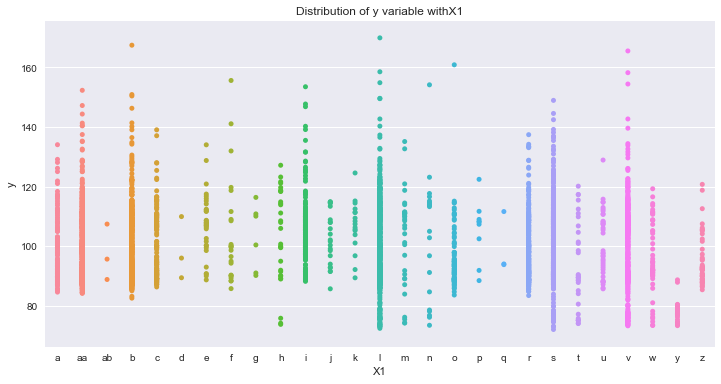

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_stripplot_y(var_name):
    col_order = np.sort(train_df[var_name].unique()).tolist()
    plt.figure(figsize=(12,6))
    sns.stripplot(x=var_name, y='y', data=train_df, order=col_order)
    plt.xlabel(var_name)
    plt.ylabel('y')
    plt.title("Distribution of y variable with" + var_name)
    plt.show()
    
#for var in ['X1','X2']:
 #   plot_stripplot_y(var)

In [38]:
def plot_boxplot_y(var_name):
    col_order = np.sort(train_df[var_name].unique()).tolist()
    plt.figure(figsize=(12,6))
    sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
    plt.xlabel(var_name)
    plt.ylabel('y')
    plt.title("Distribution of y variable with" + var_name)
    plt.show()
    
#for var in ['X12','X13']:
 #   plot_boxplot_y(var)
for col in train_df.columns:
    if train_df[col].dtype == 'int64':
        #print col 
        plot_boxplot_y(col)

KeyboardInterrupt: 

In [37]:
X = pd.DataFrame([['a', 0, 3], ['c', 1, 0], ['c', 2, 1], ['b', 0, 2]], columns=list('ABC'))
X

,A,B,C
0,a,0,3
1,c,1,0
2,c,2,1
3,b,0,2


In [38]:
pd.get_dummies(X)

,B,C,A_a,A_b,A_c
0,0,3,1,0,0
1,1,0,0,0,1
2,2,1,0,0,1
3,0,2,0,1,0


In [39]:
train_df_dummy = pd.get_dummies(train_df)
test_df_dummy = pd.get_dummies(test_df)
train_df_dummy.head()

,ID,y,X10,X12,X13,X14,X16,X17,X18,X19,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,130.81,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
test_df_dummy.head()

,ID,X10,X12,X13,X14,X16,X17,X18,X19,X20,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.preprocessing import LabelEncoder
#categorical_features = ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]
#for f in categorical_features:
 #       lbl = LabelEncoder()
 #       lbl.fit(list(train_df[f].values)) 
 #       train_df[f] = lbl.transform(list(train_df[f].values))
#train_df.head()

for col in train_df.columns:
    if train_df[col].dtype == 'object':
        lbl = LabelEncoder() 
        lbl.fit(list(train_df[col].values) + list(test_df[col].values)) 
        train_df[col] = lbl.transform(list(train_df[col].values))
        test_df[col] = lbl.transform(list(test_df[col].values))

In [42]:
from sklearn.model_selection import train_test_split

train_df = train_df_dummy
test_df = test_df_dummy

X = train_df.drop(['y'], axis=1)
y = train_df['y']

#test_df = test_df.drop(['ID'], axis=1)

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head()

,ID,X10,X12,X13,X14,X16,X17,X18,X19,X20,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
3862,7746,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2241,4482,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,1133,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2132,4262,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1703,3411,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
dtr = DecisionTreeRegressor(max_depth=4)
dtr.fit(X_train, y_train)
dtr

# Predict
#X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
#y_1 = regr_1.predict(X_test)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [44]:
from sklearn.metrics import r2_score,mean_squared_error
def get_eval(dtr, X_eval, y_eval):
    y_pred =  dtr.predict(X_eval)
    print("R2:",r2_score(y_eval, y_pred))
    #print("MSE:",mean_squared_error(y_eval, y_pred))

In [45]:
test_df_dummy.head()

,ID,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
get_eval(dtr, X_train, y_train)
get_eval(dtr, X_eval, y_eval)

('R2:', 0.63168571452178379)
('R2:', 0.54569522035921159)


In [46]:
sum(dtr.feature_importances_)

0.99999999999999989

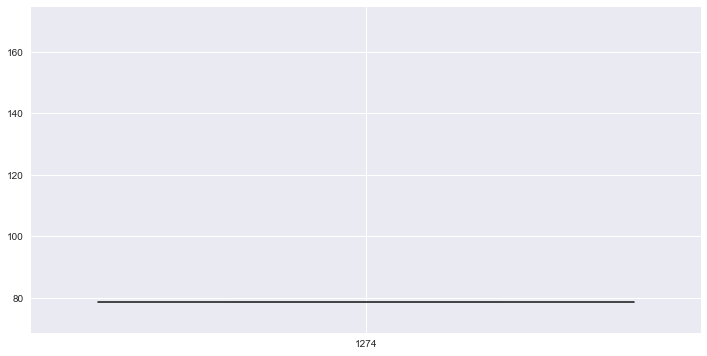

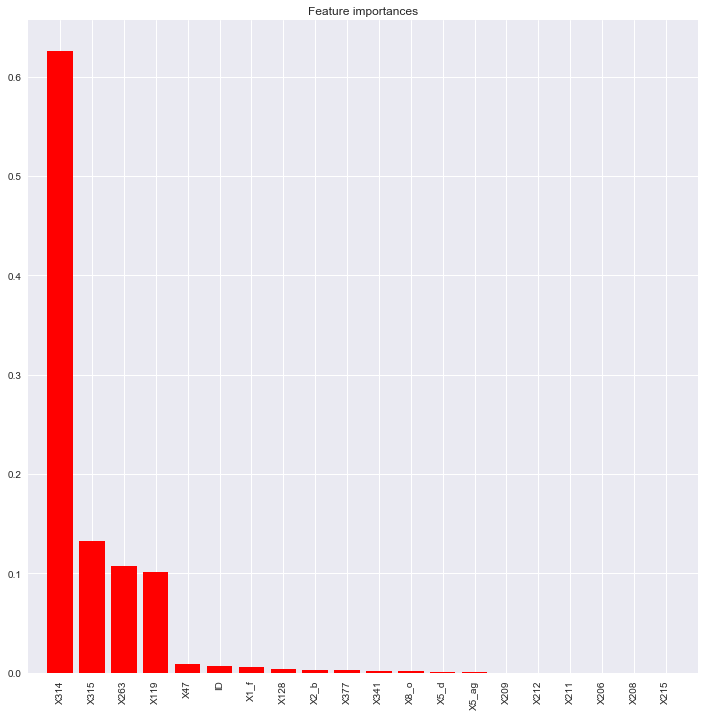

In [47]:
feat_names = X_train.columns.values

## plot the importances ##
importances = dtr.feature_importances_
#std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [51]:
# res
def out_res_file(dtr, test_df, out_file):
    y_pred =  dtr.predict(test_df)
    output = pd.DataFrame({'id': test_df['ID'].astype(np.int32), 'y': y_pred})
    output.to_csv(out_file, index=False)
    
out_res_file(dtr, test_df_dummy, 'dtr_max_depth_4.csv')

ValueError: Number of features of the model must match the input. Model n_features is 488 and input n_features is 494 

In [68]:
from sklearn.ensemble import RandomForestRegressor
# Fit regression model
rf = RandomForestRegressor(n_estimators=50, max_depth=5)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [69]:
get_eval(rf, X_train, y_train)
get_eval(rf, X_eval, y_eval)

('R2:', 0.64682151038911606)
('R2:', 0.49544946196866091)


In [ ]:
out_res_file(rf, test_df, 'drf_tree_10.csv')
for n_est in [20,30,40,50,100]:
    for depth in [3,4,5,6,7,8]:
        rf = RandomForestRegressor(n_estimators=50, max_depth=5)
        rf.fit(X_train, y_train)
        s_train = get_eval(rf, X_train, y_train)
        s_eval = get_eval(rf, X_eval, y_eval)
        print "tree:%d depth:%d "%(n_est, depth), s_train, s_eval

In [78]:
from sklearn.model_selection  import cross_val_score

rf = RandomForestRegressor(n_estimators=250, max_depth=3)
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
#s_train = get_eval(rf, X_train, y_train)
#s_eval = get_eval(rf, X_eval, y_eval)
#print "tree:%d depth:%d "%(n_est, depth), s_train, s_eval

scores

array([ 0.54992159,  0.62465827,  0.59288096,  0.64632868,  0.58392707])

In [79]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.60 (+/- 0.07)


In [77]:
s_train = get_eval(rf, X_train, y_train)
s_eval = get_eval(rf, X_eval, y_eval)
print "tree:%d depth:%d "%(n_est, depth), s_train, s_eval

NotFittedError: Estimator not fitted, call `fit` before exploiting the model.